In [68]:
import re
import numpy as np

In [69]:
import nltk
from nltk.corpus import stopwords

## Load toxicity model

In [4]:
from detoxify import Detoxify
model = Detoxify('multilingual')
results = model.predict(['jajajajajaja que hijo de puta'])
results

{'toxicity': [0.9918322563171387]}

In [4]:
def get_toxicity(message):
  return model.predict(message)["toxicity"]

## READ FROM TXT FILE

In [70]:
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from pathlib import Path

plt.rcParams["figure.figsize"] = (20, 20)


In [71]:
akas_for_each_person = {
    
}

In [72]:
path = Path("./Chat_as_DF.pkl")
if path.is_file():
    after_process = pd.read_pickle(path)

In [73]:
keys = ["Person1",
        "Person2",
        "Person3",
        "Person4",
        "Person5",
        "Person6",
        "Person7",
        "Person8",
        "Person9",
        "Person10",
        "Person11",
        "Person12",
        "Person13",]#akas_for_each_person.keys()

In [74]:
after_process['User'] = 'Person' + pd.Series(pd.factorize(after_process['User'])[0] + 1).astype(str)

In [75]:
after_process = after_process[after_process["User"].isin(keys)]
total_messages = len(after_process)

In [76]:
after_process[:10]

,Date,Day_of_Week,Hour,Mentions,Message_Clean,Message_Only_Text,Message_Raw,Toxicity,User
0,2017-12-04 20:15:59,0.0,20.0,{},Amiguitos nuevos,amiguitos nuevos,[4/12/17 20:15:59] Bian Artola: Amiguitos nuev...,0.011879,Person1
1,2017-12-04 20:16:16,0.0,20.0,{},Quien hace un resumen,quien hace un resumen,[4/12/17 20:16:16] Agus Superi: Quien hace un ...,0.017590,Person2
2,2017-12-04 20:16:18,0.0,20.0,{},🙈,🙈,[4/12/17 20:16:18] Agus Superi: 🙈\n,0.053499,Person2
3,2017-12-04 20:16:25,0.0,20.0,{},Quiero que copies toda la conversación Bian,quiero que copies toda la conversación bian,[4/12/17 20:16:25] Tomi Felder: Quiero que cop...,0.016306,Person3
4,2017-12-04 20:17:00,0.0,20.0,{},Yo si querés hago desde el comentario 1 al 12,yo si querés hago desde el comentario 1 al 12,[4/12/17 20:17:00] Tomi Felder: Yo si querés h...,0.001018,Person3
5,2017-12-04 20:17:15,0.0,20.0,{Agus Streitenberger},"Asado lunes, eligan postre y dj blitz es agus ...","asado lunes, eligan postre y dj blitz es agus ...","[4/12/17 20:17:15] Igna Suburu: Asado lunes, e...",0.313558,Person4
6,2017-12-04 20:17:21,0.0,20.0,{},JAJAJAJAJAJA,jajajajajaja,[4/12/17 20:17:21] Agus Superi: JAJAJAJAJAJA\n,0.159800,Person2
7,2017-12-04 20:17:26,0.0,20.0,{},Suburu sos el mejor,suburu sos el mejor,[4/12/17 20:17:26] Agus Superi: Suburu sos el ...,0.232157,Person2
8,2017-12-04 20:17:28,0.0,20.0,{},Jan,jan,[4/12/17 20:17:28] Igna Suburu: Jan\n,0.002712,Person4
9,2017-12-04 20:17:31,0.0,20.0,{},Perdom,perdom,[4/12/17 20:17:31] Igna Suburu: Perdom\n,0.492670,Person4


In [77]:
total_messages

99279

In [7]:
from tqdm.notebook import tqdm_notebook

In [8]:
def process_line(line):
    regex_result = re.search("\[(\d{1,2}\/\d{1,2}\/\d{2}) (\d\d:\d\d:\d\d)\] ([\w| ]*): (.*)$", line)
    Message_Raw = line
    date = regex_result.group(1)
    time = regex_result.group(2)
    name_in_line = regex_result.group(3)
    message = regex_result.group(4)
    toxicity = get_toxicity(message)
    mentions = set();
    date = datetime.strptime(f"{date} {time}", "%d/%m/%y %H:%M:%S")
    for person in akas_for_each_person:
        for aka in akas_for_each_person[person]:
          if re.search(f"\\b{aka}\\b", message):
            mentions.add(person)
            break
    return {
            "User": name_in_line,
            "Message_Raw": Message_Raw,
            "Message_Clean": message,
            "Message_Only_Text": message.lower() ,
            "Toxicity": toxicity,
            "Mentions": mentions,
            "Date": date,
            "Hour": date.hour,
            "Day_of_Week": date.weekday()
           }

In [9]:
after_process = pd.DataFrame()
with open("./Alloy_Del_Negro-Clean.txt", "r") as chat:
    length = len(chat.readlines())
    chat.seek(0)
    with tqdm_notebook(total=length) as progress_bar:
        for line in chat:
            try:
                after_process = after_process.append(process_line(line), ignore_index=True)
            except Exception as err:
                pass
            finally:
                progress_bar.update(1)
            


  0%|          | 0/101288 [00:00<?, ?it/s]

In [10]:
after_process.to_pickle("Chat_as_DF.pkl")

In [34]:
after_process = pd.DataFrame()
with open("./Alloy_Del_Negro-Clean.txt", "r") as chat:
    s = chat.read(1024)

print(s)
a = re.split(r'(\[\d{1,2}\/\d{1,2}\/\d{2} \d\d:\d\d:\d\d\]) ', s)[1:]
pair = zip(a[0::2],a[1::2])
print(list(pair))


[4/12/17 20:15:59] Bian Artola: Amiguitos nuevos
[4/12/17 20:16:16] Agus Superi: Quien hace un resumen
[4/12/17 20:16:18] Agus Superi: 🙈
[4/12/17 20:16:25] Tomi Felder: Quiero que copies toda la conversación Bian
[4/12/17 20:17:00] Tomi Felder: Yo si querés hago desde el comentario 1 al 12
[4/12/17 20:17:15] Igna Suburu: Asado lunes, eligan postre y dj blitz es agus strei jajajajaja
[4/12/17 20:17:21] Agus Superi: JAJAJAJAJAJA
[4/12/17 20:17:26] Agus Superi: Suburu sos el mejor
[4/12/17 20:17:28] Igna Suburu: Jan
[4/12/17 20:17:31] Igna Suburu: Perdom
[4/12/17 20:17:35] Igna Suburu: *
[4/12/17 20:17:38] Bian Artola: Hijo d puta
[4/12/17 20:17:55] Igna Suburu: Solo se escribir en java
[4/12/17 20:18:38] Tomi Felder: Tirame opciones Superi
[4/12/17 20:19:02] Agus Superi: Chocotorta
[4/12/17 20:19:10] Agus Superi: Tiramisu (el de vainillas)
[4/12/17 20:19:18] Agus Superi: Brownie
[4/12/17 20:19:37] Igna Suburu: Uuubrownie con helado
[4/12/17 20:19:39] Igna Suburu: Porfavor
[4/12/17 20:20:

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(after_process["Message_Only_Text"], after_process["User"], test_size=0.2, random_state=42)

## Messages sent by person

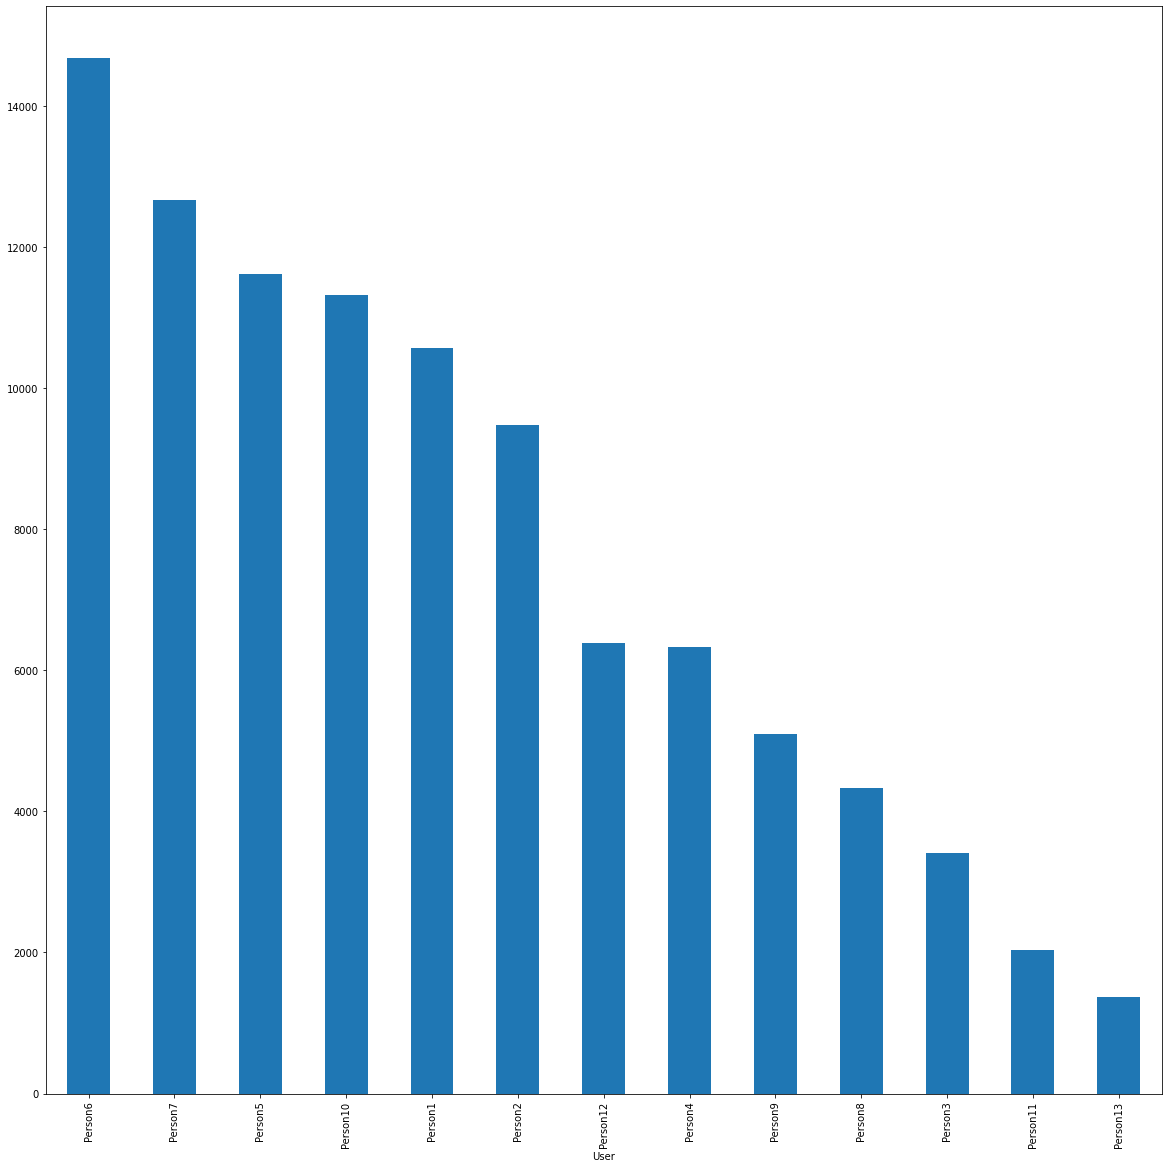

In [78]:
messages_by_person = after_process.groupby("User")
messages_by_person["User"].count().sort_values(ascending=False).plot(kind="bar")

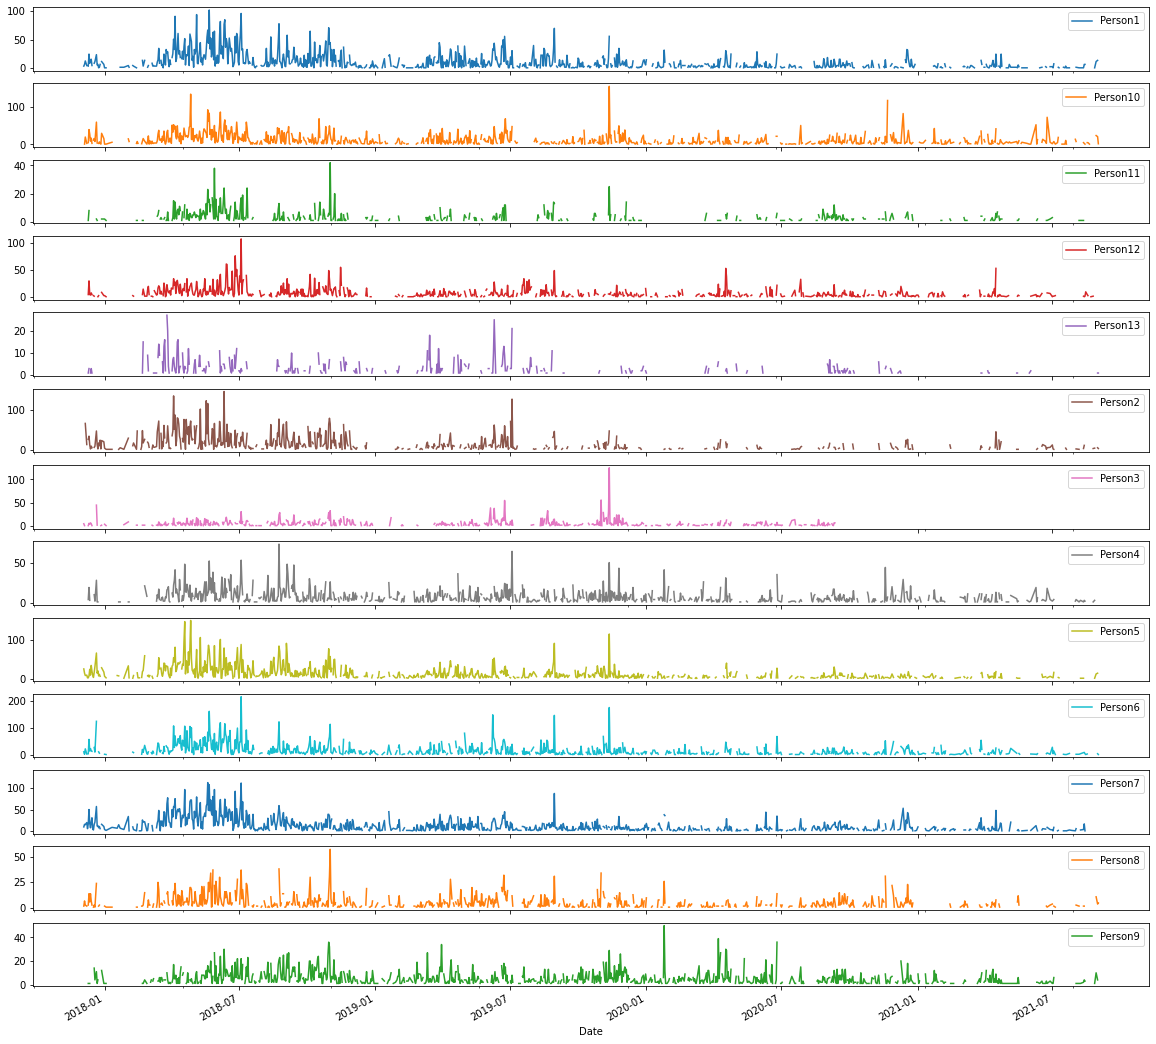

In [79]:
by_date_by_person = after_process.groupby(["User", after_process["Date"].dt.date])["User"].count().unstack('User').plot(kind="line", subplots=True)


## Messages per week

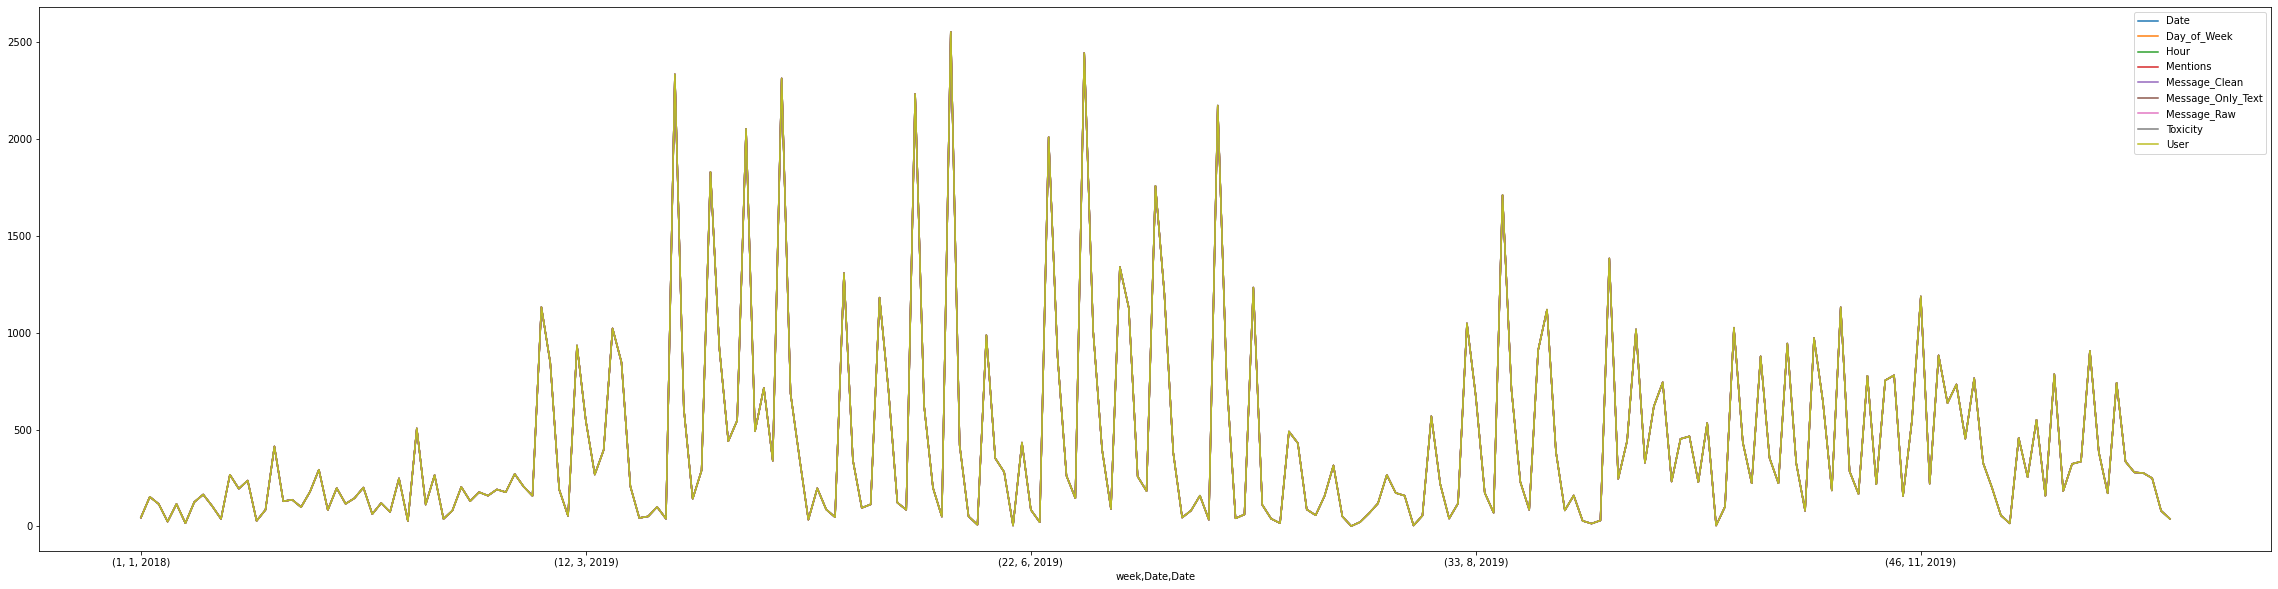

In [80]:
by_date_by_person = after_process.groupby([after_process["Date"].dt.isocalendar().week, after_process["Date"].dt.month, after_process["Date"].dt.year]).count().plot(kind="line", figsize=(40,10))


## Day with max number of messages for each person

In [81]:
max_messages_on_a_day_per_person = after_process.groupby(["User", after_process["Date"].dt.date]).count().sort_values(by="Hour").groupby(level=0).tail(1).sort_values(ascending=False, by="Hour")

max_messages_on_a_day_per_person["Date"].reset_index(name="Total messages")

,User,Date,Total messages
0,Person6,2018-07-04,215
1,Person10,2019-11-12,156
2,Person5,2018-04-27,150
3,Person2,2018-06-11,146
4,Person7,2020-11-21,134
5,Person3,2019-11-12,125
6,Person12,2018-07-04,107
7,Person1,2018-05-22,102
8,Person4,2018-08-24,73
9,Person8,2018-11-01,57


## Day of the week with most messages for each person

In [82]:
import calendar

messages_by_day_of_week = after_process.groupby(["User", after_process["Date"].dt.weekday]).count().sort_values(by="Hour")["Date"]

matrix_of_messages = messages_by_day_of_week.unstack()
matrix_of_messages.columns = map(lambda x: calendar.day_name[x],matrix_of_messages.columns)
matrix_of_messages.style.background_gradient(cmap="RdYlGn")

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
User,,,,,,,
Person1,1506,1746,1411,1814,1922,1213,961
Person10,1714,1885,1834,2046,1717,1211,910
Person11,256,332,313,433,338,185,182
Person12,808,907,1184,1250,1071,657,514
Person13,273,246,217,245,194,83,107
Person2,1366,1591,1583,1765,1709,695,773
Person3,547,576,551,593,546,346,244
Person4,914,949,939,1194,1070,712,557
Person5,1459,1768,1648,2040,2175,1585,934


## Top 10 days with higher number of messages

In [83]:
higher_number_of_messages = after_process.groupby(after_process["Date"].dt.date).count()

for day in higher_number_of_messages.nlargest(columns="Hour", n=10).iterrows():
    print(f'Day (YYYY-MM-dd): {day[0]} - Number of messages: {day[1]["Hour"]}')

Day (YYYY-MM-dd): 2018-07-04 - Number of messages: 828
Day (YYYY-MM-dd): 2019-11-12 - Number of messages: 797
Day (YYYY-MM-dd): 2018-05-22 - Number of messages: 657
Day (YYYY-MM-dd): 2018-08-24 - Number of messages: 641
Day (YYYY-MM-dd): 2018-04-27 - Number of messages: 612
Day (YYYY-MM-dd): 2018-05-20 - Number of messages: 610
Day (YYYY-MM-dd): 2018-06-06 - Number of messages: 605
Day (YYYY-MM-dd): 2018-04-04 - Number of messages: 586
Day (YYYY-MM-dd): 2019-08-30 - Number of messages: 580
Day (YYYY-MM-dd): 2018-05-29 - Number of messages: 579


## Hour with the higher number of messages overall

In [84]:
higher_number_of_messages_of_hour = after_process.groupby(after_process["Date"].dt.hour).count()


print(f'Hour: {higher_number_of_messages_of_hour.idxmax()["Date"]} - Number of messages: {higher_number_of_messages.max()["Date"]}')

Hour: 19 - Number of messages: 828


## Most messages in an hour

In [85]:
higher_number_of_messages = after_process.groupby([after_process["Date"].dt.date, after_process["Date"].dt.hour]).count()

print(f'Day (YYYY-MM-dd): {higher_number_of_messages.idxmax()["Date"][0]} - Hour: {higher_number_of_messages.idxmax()["Date"][1]} - Number of messages: {higher_number_of_messages.max()["Date"]}')

Day (YYYY-MM-dd): 2018-06-11 - Hour: 21 - Number of messages: 268


## Messages per hour

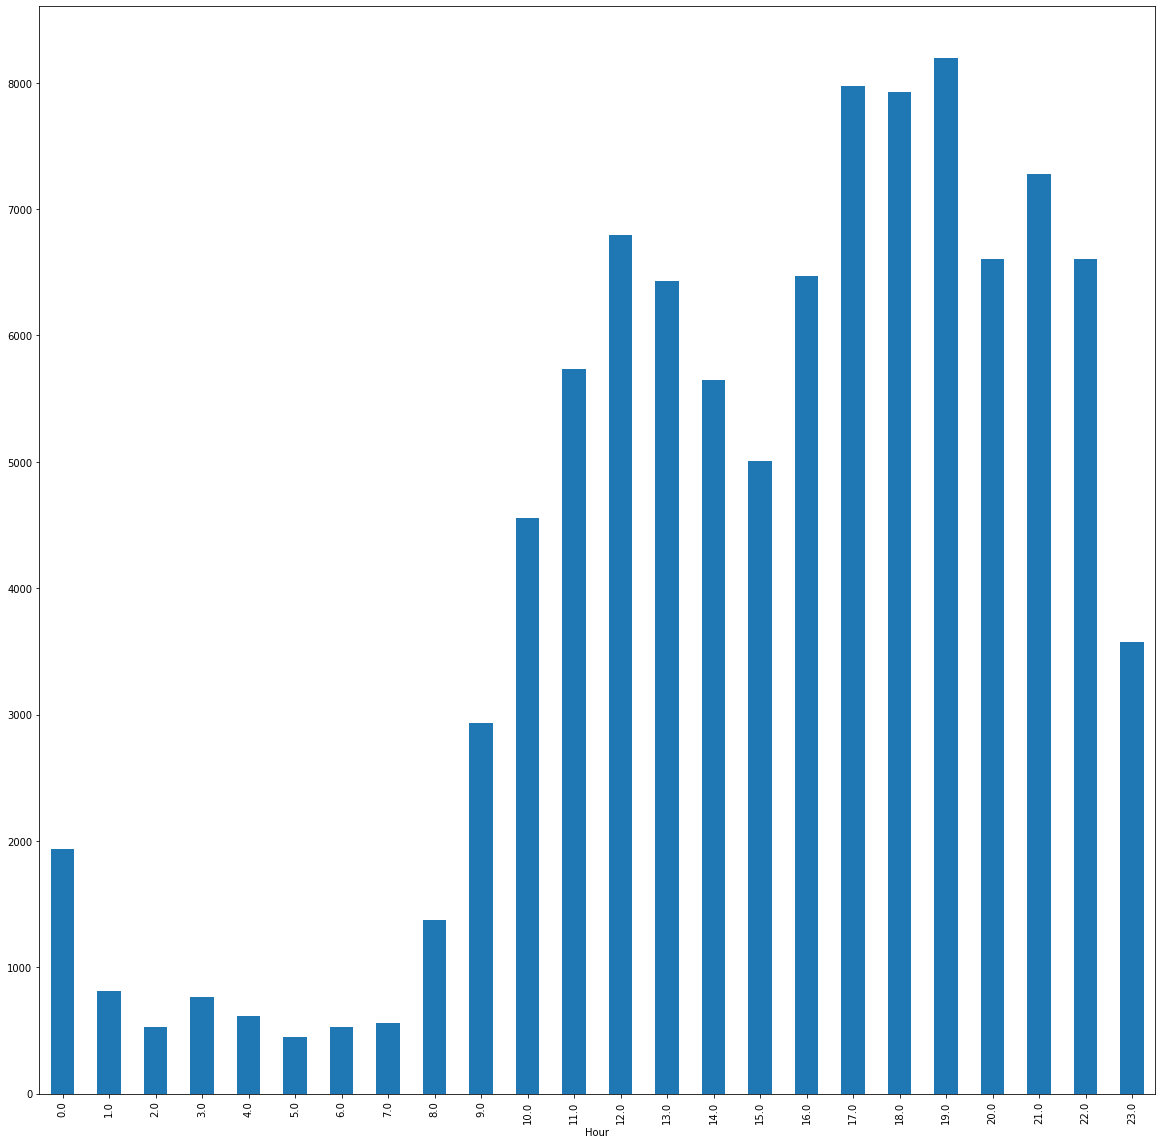

In [86]:
messages_per_hour = after_process.groupby("Hour")["Hour"].count().plot(kind="bar")

## Messages per day of the week

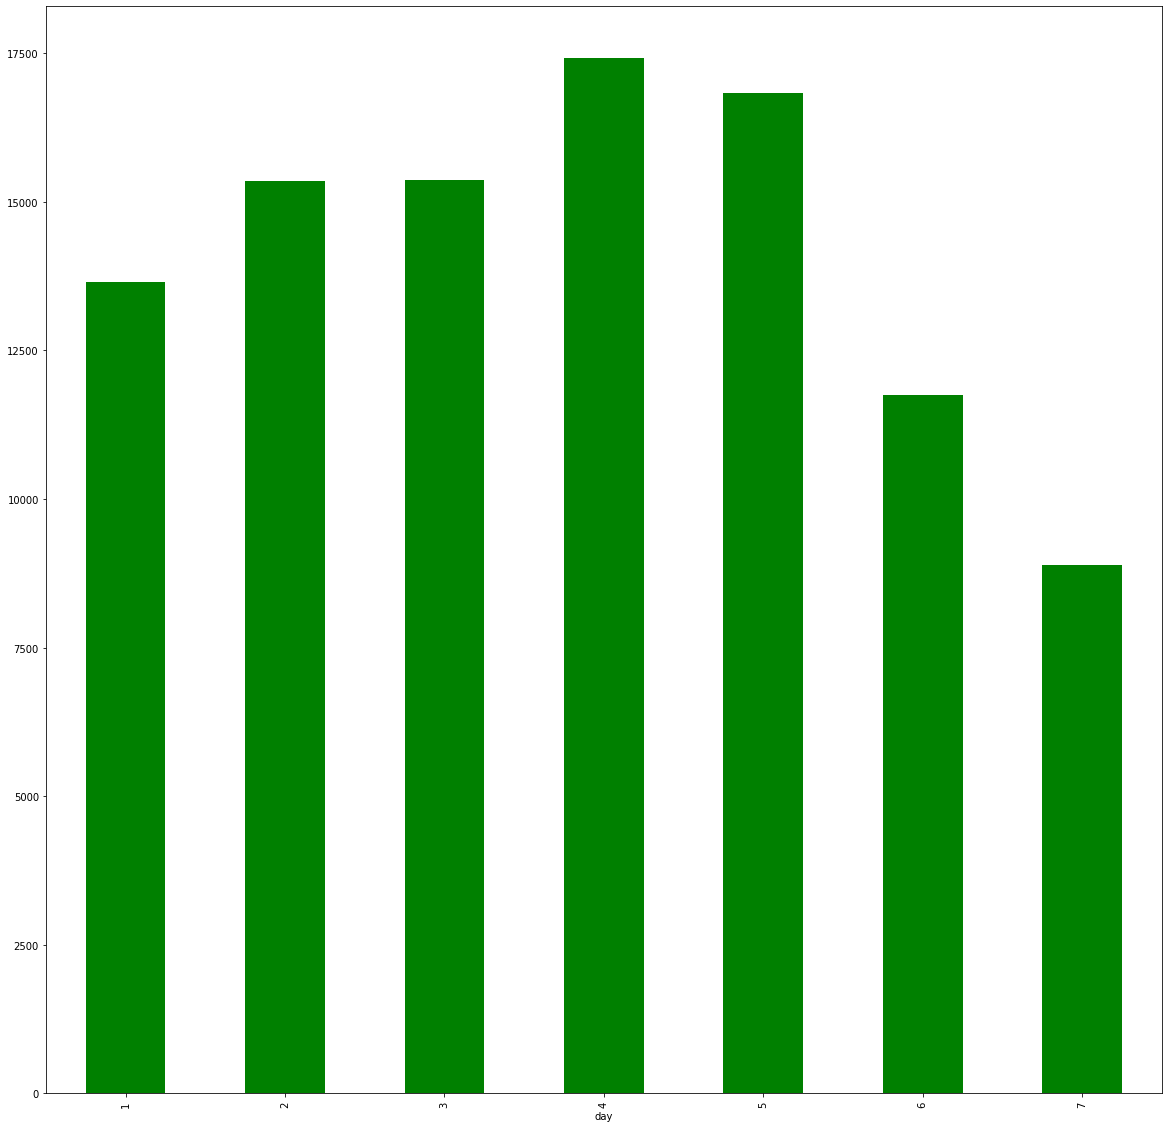

In [87]:
messages_per_hour = after_process.groupby(after_process["Date"].dt.isocalendar().day)["Hour"].count().plot(kind="bar", color="green")

## Messages per week of the each year

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb27a9a2c70>,
      dtype=object)

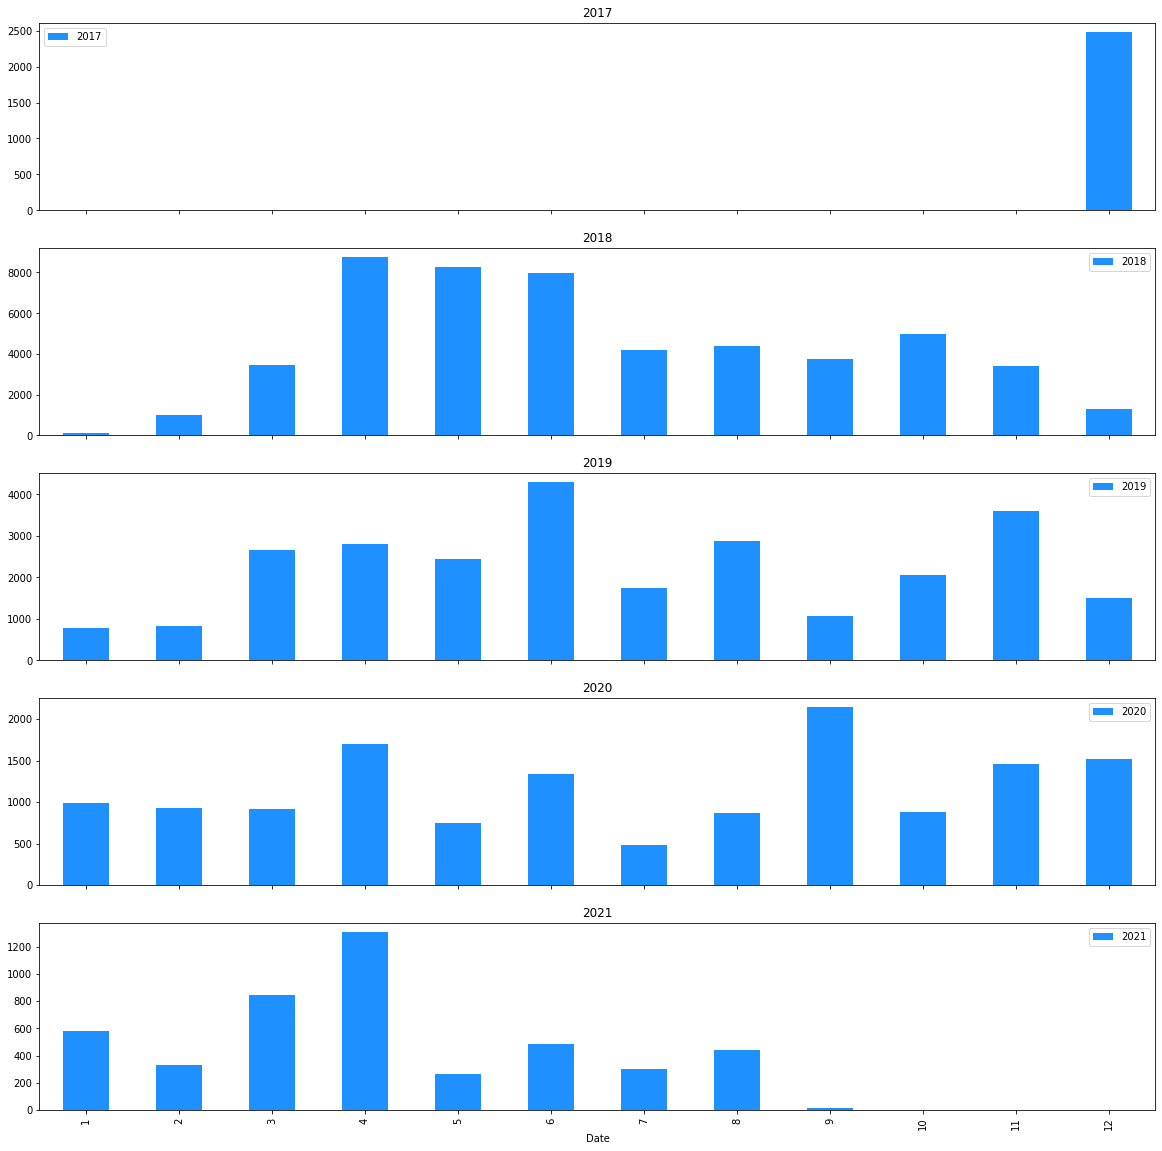

In [88]:
after_process.groupby([after_process["Date"].dt.month, after_process["Date"].dt.year])["Hour"].count().unstack(level=1).plot(kind="bar", color="dodgerblue", subplots=True)

## Total messages per year

In [89]:
messages_per_year = after_process.groupby(after_process["Date"].dt.year).count()
print(f'Total: {messages_per_year["Hour"].to_string()} \n---------\nAverage: {(messages_per_year["Hour"] / 365).to_string()}')

Total: Date
2017     2485
2018    51638
2019    26614
2020    13978
2021     4564 
---------
Average: Date
2017      6.808219
2018    141.473973
2019     72.915068
2020     38.295890
2021     12.504110


## Average length per person

In [90]:
messages_by_person["Message_Clean"].apply(lambda x: np.mean(x.str.len())).reset_index(name='Average length of message').style.background_gradient(cmap="RdYlGn")

,User,Average length of message
0,Person1,23.259056
1,Person10,27.037731
2,Person11,26.850907
3,Person12,27.432170
4,Person13,31.985348
5,Person2,22.101877
6,Person3,28.810755
7,Person4,24.808208
8,Person5,24.714446
9,Person6,29.751482


## Amount of characters written by each person

In [91]:
messages_by_person["Message_Clean"].apply(lambda x: np.sum(x.str.len())).reset_index(name='Number of total characters').style.background_gradient(cmap="RdYlGn")

,User,Number of total characters
0,Person1,245918
1,Person10,305986
2,Person11,54749
3,Person12,175319
4,Person13,43660
5,Person2,209570
6,Person3,98043
7,Person4,157160
8,Person5,286910
9,Person6,436603


In [92]:
message_counter =  Counter(after_process["User"])

In [93]:
message_counter

Counter({'Person1': 10573,
         'Person2': 9482,
         'Person3': 3403,
         'Person4': 6335,
         'Person5': 11609,
         'Person6': 14675,
         'Person7': 12663,
         'Person8': 4329,
         'Person9': 5098,
         'Person10': 11317,
         'Person11': 2039,
         'Person12': 6391,
         'Person13': 1365})

## Matrix of responses per pair of persons

In [94]:
tuples_of_lines = zip(after_process[2:].iterrows(), after_process[3:].iterrows())
print(tuples_of_lines)
initial_dict = dict.fromkeys(keys, 0)

matrix_of_responses = {key: initial_dict.copy() for key in keys }

for line in tuples_of_lines:
  person_asking = line[0][1]["User"]
  person_responding = line[1][1]["User"]
  matrix_of_responses[person_asking][person_responding] += 1

In [95]:
#normalize count
for key in matrix_of_responses:
    for inner_key in matrix_of_responses[key]:
      #matrix_of_responses[key][inner_key] *= (len(messages_by_person.get_group(key)) * len(messages_by_person.get_group(inner_key))) / (total_messages * total_messages)
      pass


In [98]:
len(messages_by_person.get_group("Person1"))

10573

In [99]:
matrix = []

for value in matrix_of_responses.values():
  matrix.append(list(value.values()))

matrix = np.array(matrix)
with_diagonal = np.fill_diagonal(matrix, 0)

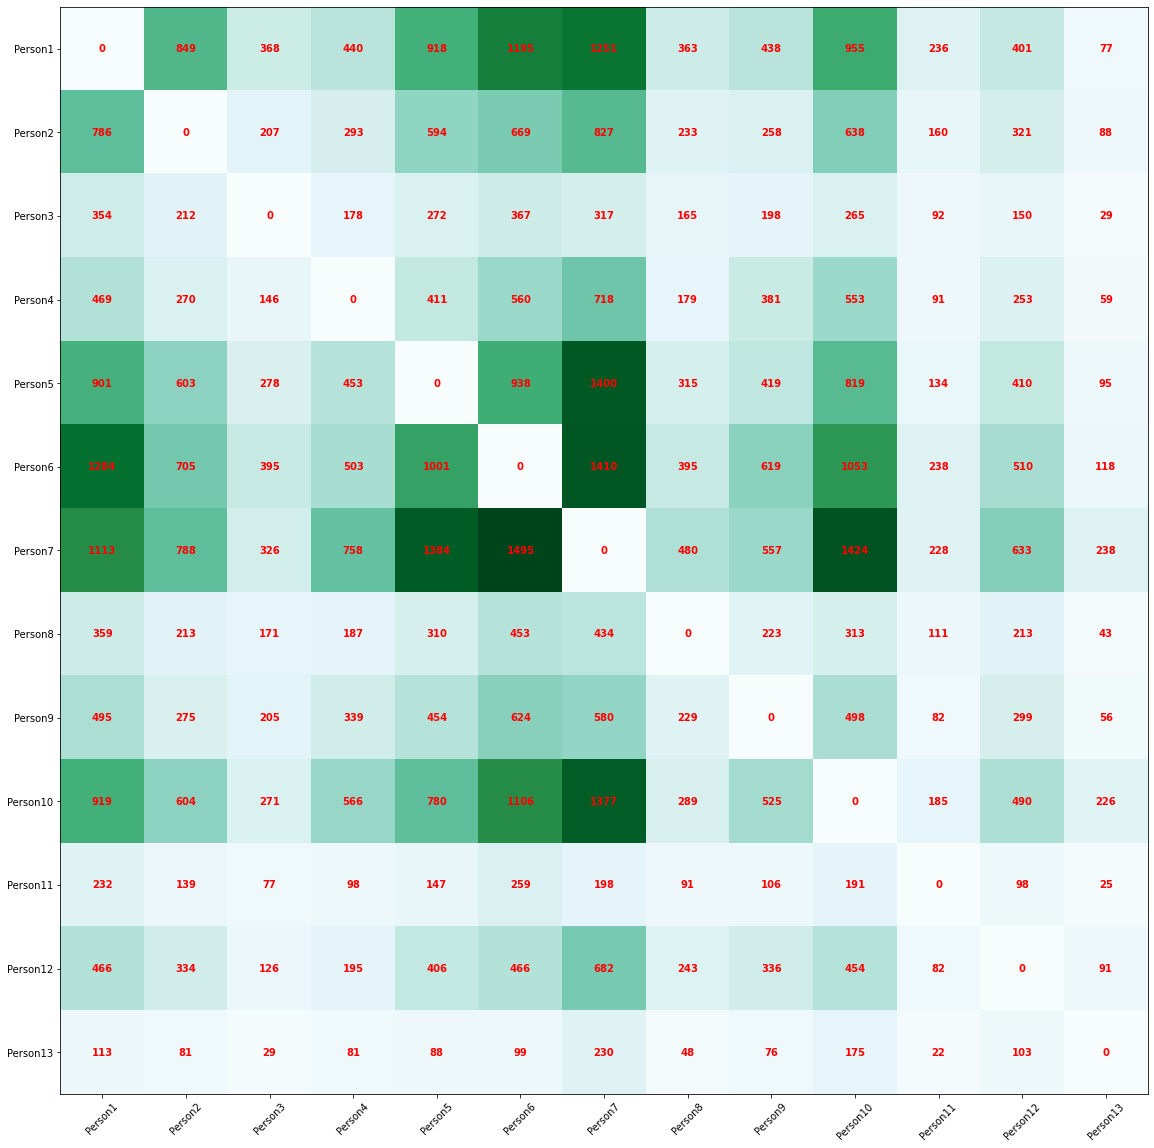

In [100]:
fig, ax = plt.subplots()

def set_ticks(ax, labels, which):
  if which == "x":
    ax.set_xticklabels(labels)
    ax.set_xticks(np.arange(len(labels)))
  else:
    ax.set_yticklabels(labels)
    ax.set_yticks(np.arange(len(labels)))

set_ticks(ax, list(matrix_of_responses.keys()), "x")
set_ticks(ax, list(matrix_of_responses.keys()), "y")

plt.xticks(rotation=45)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        text = ax.text(j, i, round(matrix[i, j], 2),
                       ha="center", va="center", color="r", fontweight="bold")

ax.imshow(matrix, cmap="BuGn")
plt.show()

#show responses/total messages

## Who laugh the most?

In [103]:
def is_laugh(message):
  reg = re.compile(r"^.*\b[JjeEiIAakKSs]{3,}\b.*$")
  is_jj = re.compile(r"^.*\b[jJ][jJ]\b.*$")
  return bool(reg.match(message)) and bool(not is_jj.match(message))

Person1
Person10
Person11
Person12
Person13
Person2
Person3
Person4
Person5
Person6
Person7
Person8
Person9


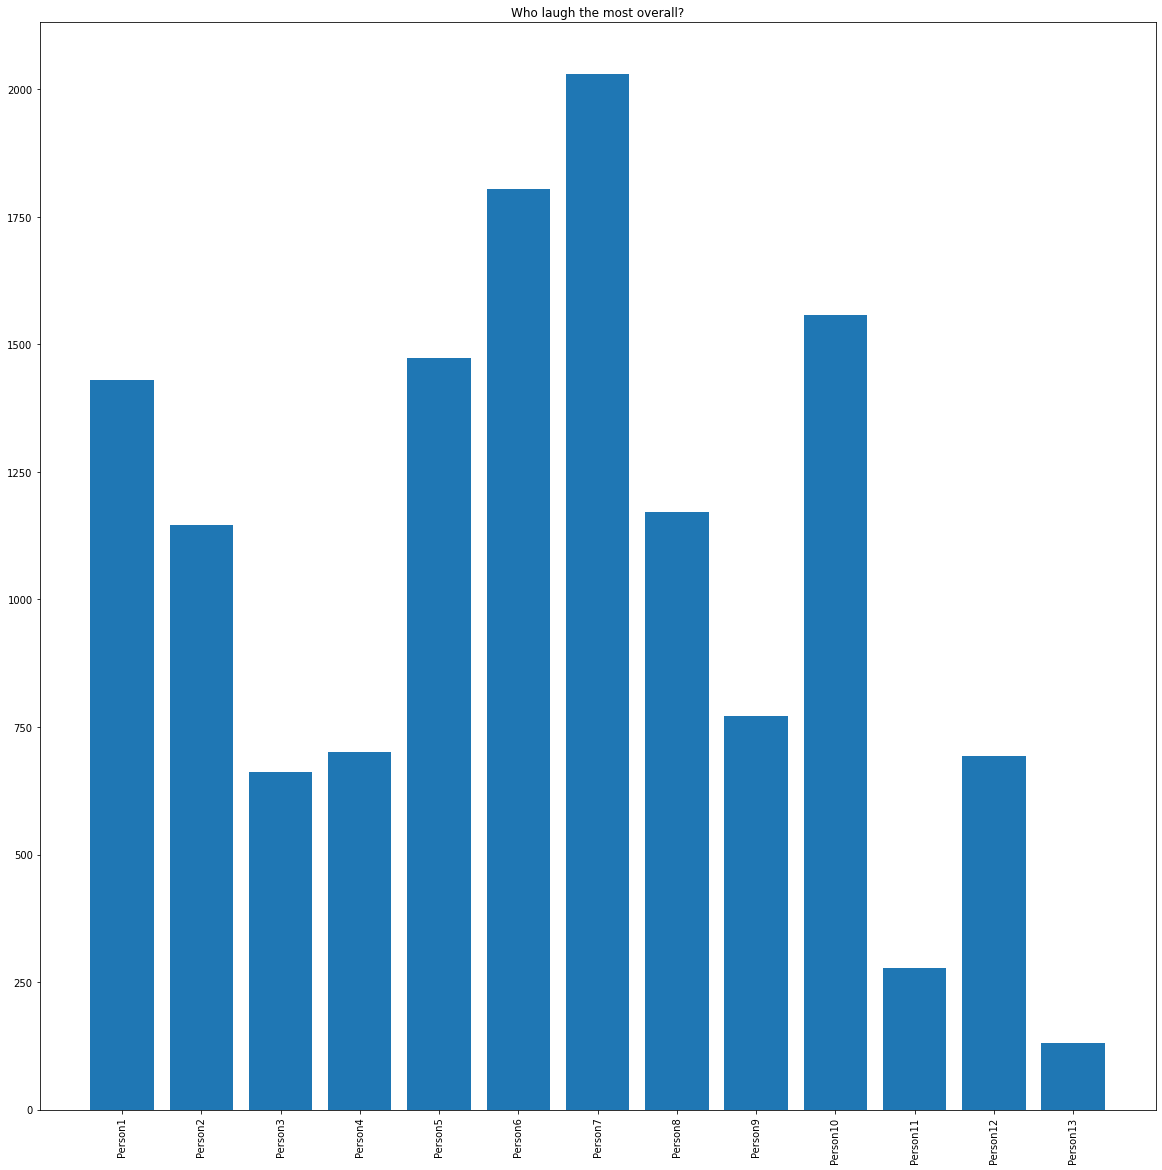

{'Person1': 1430, 'Person2': 1147, 'Person3': 661, 'Person4': 701, 'Person5': 1474, 'Person6': 1804, 'Person7': 2030, 'Person8': 1172, 'Person9': 771, 'Person10': 1558, 'Person11': 277, 'Person12': 693, 'Person13': 131}


In [104]:
count_laughs = dict.fromkeys(keys, 0)

for person, messages in messages_by_person:
  print(person)
  for message in messages.iterrows():
    if is_laugh(message[1]["Message_Clean"]):
      count_laughs[person] += 1

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most overall?")
plt.xticks(rotation=90)
plt.show()

print(count_laughs)


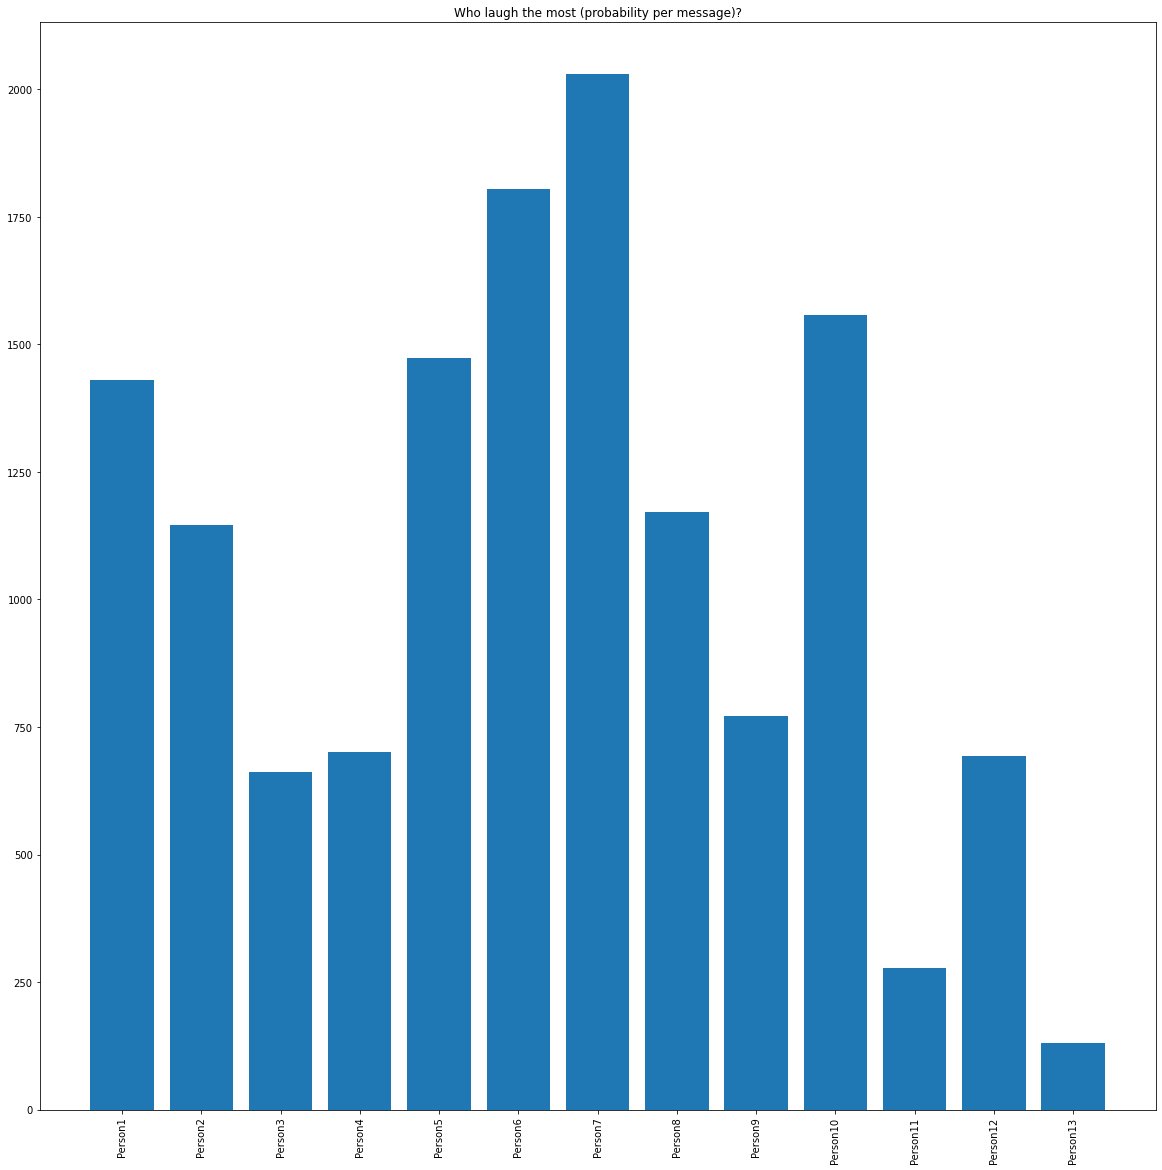

In [105]:
average_laughs = dict.fromkeys(akas_for_each_person.keys(), 0)
for person in count_laughs:
  average_laughs[person] = count_laughs[person] / len(messages_by_person.get_group(person))

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most (probability per message)?")
plt.xticks(rotation=90)
plt.show()

## Mentions matrix

In [ ]:
from itertools import chain
count_of_mentions_per_person = empty_dict_of_names.copy()

for person in messages_grouped_by_person:
  individual_count = empty_dict_of_names.copy()
  count_of_mentions_per_person[person] = dict(Counter(list(chain.from_iterable([list(message["Mentions"]) for message in messages_grouped_by_person[person]]))))


count_of_mentions_per_person

In [173]:
matrix_of_mentions = []

for mentions in count_of_mentions_per_person.values():
  matrix_of_mentions.append(list(np.array(list(mentions.values())).astype(float)))

#matrix_of_mentions = np.array(matrix_of_mentions)
#np.fill_diagonal(matrix_of_mentions, 0)

matrix_of_mentions

[[89.0,
  123.0,
  127.0,
  113.0,
  79.0,
  73.0,
  115.0,
  100.0,
  55.0,
  118.0,
  71.0,
  31.0,
  6.0],
 [],
 [25.0, 23.0, 36.0, 36.0, 41.0, 39.0, 13.0, 43.0, 58.0, 28.0, 21.0, 8.0],
 [22.0, 27.0, 50.0, 3.0, 8.0, 3.0, 7.0, 3.0, 5.0, 6.0, 2.0, 2.0],
 [],
 [27.0, 15.0, 22.0, 21.0, 18.0, 15.0, 7.0, 24.0, 9.0, 23.0, 18.0, 5.0, 5.0],
 [],
 [10.0, 15.0, 19.0, 12.0, 11.0, 38.0, 15.0, 13.0, 4.0, 1.0, 18.0, 20.0, 7.0],
 [44.0, 32.0, 42.0, 44.0, 42.0, 6.0, 17.0, 19.0, 21.0, 8.0, 18.0, 20.0, 15.0],
 [36.0, 17.0, 41.0, 23.0, 47.0, 49.0, 59.0, 27.0, 25.0, 40.0, 31.0, 8.0, 4.0],
 [1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0],
 [82.0, 51.0, 51.0, 60.0, 51.0, 70.0, 16.0, 27.0, 6.0, 51.0, 51.0, 4.0, 56.0],
 [10.0, 14.0, 17.0, 13.0, 8.0, 11.0, 18.0, 11.0, 11.0, 8.0, 13.0, 1.0, 11.0],
 [],
 [75.0, 16.0, 47.0, 29.0, 40.0, 6.0, 36.0, 47.0, 19.0, 26.0, 5.0, 21.0, 7.0],
 [22.0, 35.0, 25.0, 13.0, 48.0, 18.0, 11.0, 21.0, 19.0, 13.0, 21.0, 2.0, 1.0],
 [113.0,
  85.0,
  51.0,
  48.0,
  71.0,
  9.0,
  

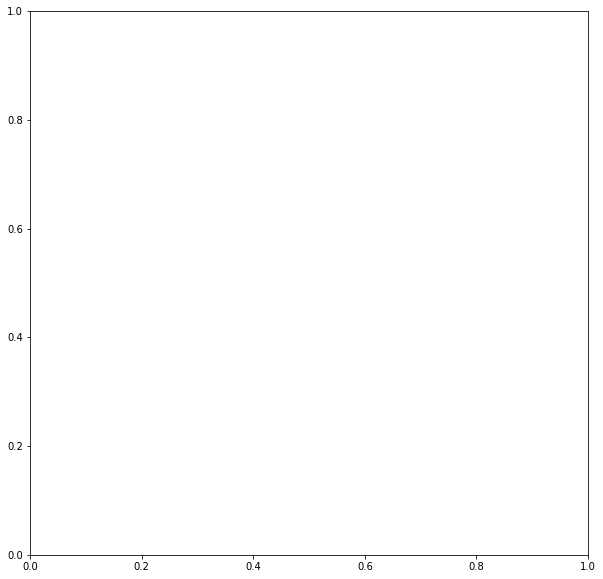

In [174]:
figure, axis = plt.subplots()

#set_ticks(axis, list(count_of_mentions_per_person.keys()), "x")
#set_ticks(axis, list(count_of_mentions_per_person.keys()), "y")

#plt.xticks(rotation=90)

#axis.imshow(matrix_of_mentions, cmap=plt.cm.binary)
#plt.show()

## Average toxicity by person

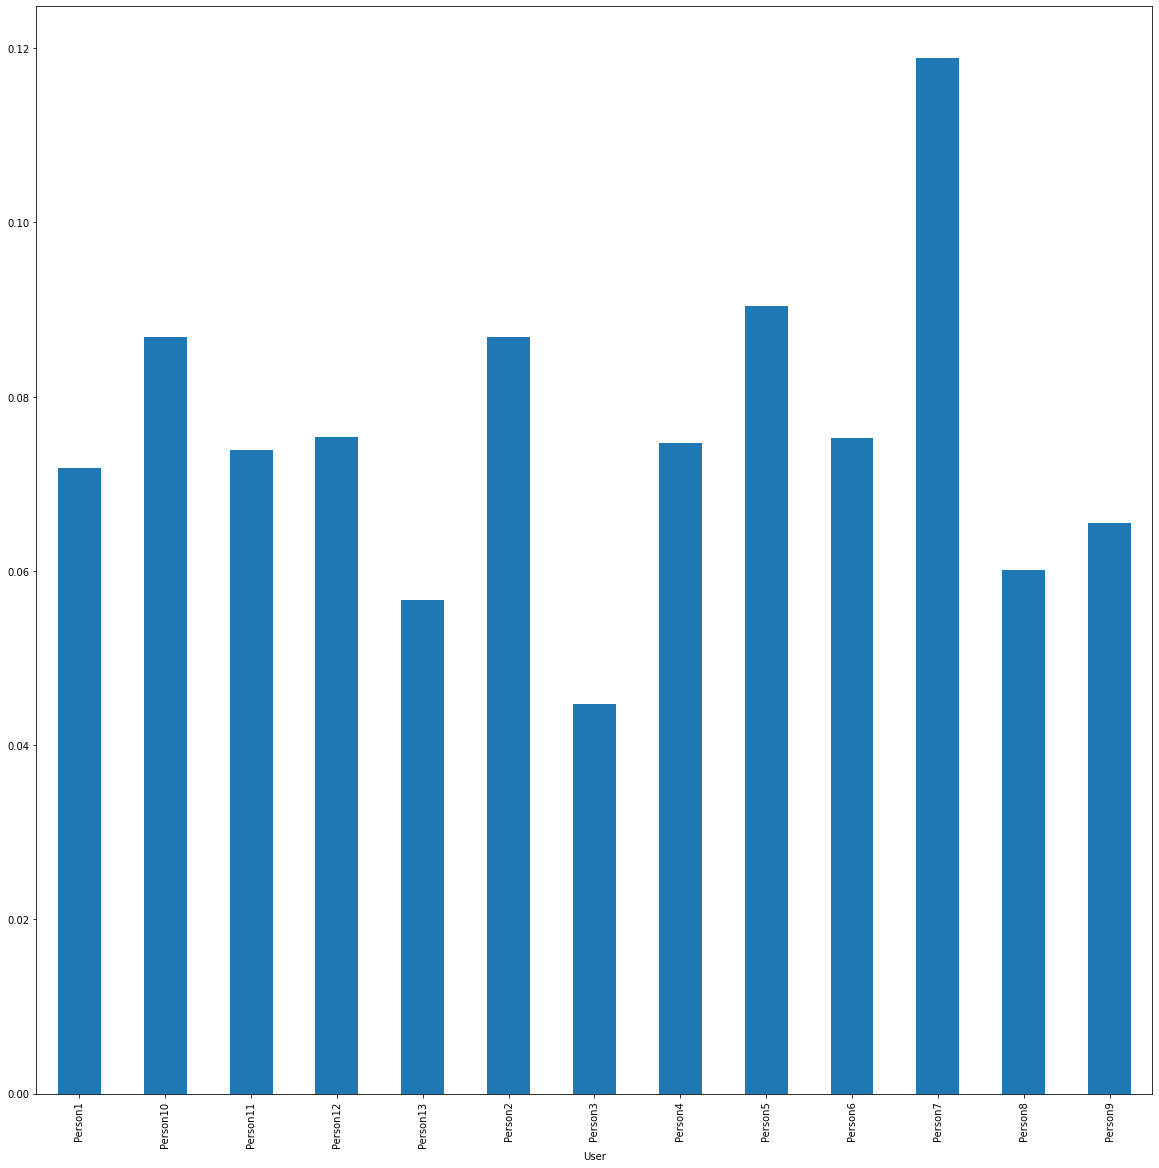

In [106]:
toxic_messages = after_process.groupby("User").mean()
toxic_messages["Toxicity"].plot(kind="bar")

### Top 10 most toxic messages

In [107]:
after_process.nlargest(10, "Toxicity")[["Message_Clean", "Toxicity"]].reset_index()

,index,Message_Clean,Toxicity
0,47529,Que pedazo de hijo de puta,0.996398
1,79146,Que pedazo de hijo de puta,0.996398
2,89994,Para la puta q te pario no se jode con eso,0.996310
3,91911,Cállate la puta que te pario,0.996244
4,36081,Raped face student gets fuck by their college ...,0.996147
5,69369,morite larrea hijo de puta,0.996112
6,2529,"Agus te acompaño y te doy todas mis fuerzas, o...",0.996111
7,96610,Que asco la puta madre,0.996093
8,14256,Dame la diapo de una maldito bastardo (?,0.996055
9,9679,Usted es un pedante hijo de puta,0.996008


In [108]:
from nltk.corpus import stopwords
import nltk
spanish_stopwords = stopwords.words("spanish")
spanish_stopwords.extend(["q", "dsp", "si", "<", ">", "multimedia", "omitido", "omitida", "\u200eaudio", "\u200eimagen", "\u200esticker", "\u200evideo", "\u200egif", "", "Hola", "t", "d", ""])

In [109]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/juan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
import spacy
import spacy_spanish_lemmatizer
nlp = spacy.load("es_core_news_sm")

In [111]:
import string

In [112]:
def lemmatize(message):
    return [token.lemma_ for token in nlp(message)]

def remove_word(word):
    return word in spanish_stopwords or is_laugh(word) or len(word) <= 3

def process_message(message):
    return [ token for token in nltk.word_tokenize(message.translate(str.maketrans('', '', string.punctuation))) if not remove_word(token.lower()) ]

In [113]:
process_message("Hola, como estas vos?")

['Hola']

In [114]:
messages_without_stopwords = []
for index, message in after_process.iterrows():
    new_message = message.copy()
    new_message["Message_Only_Text"] = " ".join(process_message(message["Message_Only_Text"]))
    messages_without_stopwords.append(new_message)

## Most frequently used words per person

In [116]:
messages_per_person_without_stopwords = dict.fromkeys(keys, [])
for person, messages in messages_by_person:
    for message in messages.iterrows():
        new_message = process_message(message[1]["Message_Only_Text"])
        messages_per_person_without_stopwords[person].extend(new_message)

In [117]:
most_used_words = dict.fromkeys(akas_for_each_person.keys(), 0)
for person in messages_per_person_without_stopwords:
    print(person)
    most_used_words[person] = Counter(messages_per_person_without_stopwords[person])

Person1
Person2
Person3
Person4
Person5
Person6
Person7
Person8
Person9
Person10
Person11
Person12
Person13


In [119]:
Counter(messages_per_person_without_stopwords["Person2"]).most_common(10)

[('gracias', 1289),
 ('bien', 1050),
 ('amigo', 1046),
 ('ahora', 1012),
 ('igual', 916),
 ('creo', 832),
 ('bueno', 823),
 ('mañana', 816),
 ('hacer', 781),
 ('dijo', 746)]